In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [50]:
# n=700 (>500 to get above the required city threshold)
n = 700
cities = []

for x in range(n):
    lat = np.random.uniform(-90, 90)
    lng = np.random.uniform(-180, 180)
    city = citipy.nearest_city(lat, lng)
    
    while city.city_name in cities:
        lat = np.random.uniform(-90, 90)
        lng = np.random.uniform(-180, 180)
        city = citipy.nearest_city(lat, lng)
    
    # Add the data to our lists
    cities.append(city.city_name)

In [51]:
# Base URL and imperial units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [52]:
# Query URL
query = f"{url}appid={weather_api_key}&units={units}&q="

In [53]:
# Create placeholder for temperature, humidity, cloudiness and wind speed
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
dates = []

for x in range(len(cities)):
    response = requests.get(f"{query}{cities[x]}").json()
    
    # Some cities don't have data in openweathermap, so use numpy's NaN
    try:
        temperature.append(response['main']['temp'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        
    except KeyError:
        temperature.append(np.nan)
        latitude.append(np.nan)
        longitude.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        
    
    # Sometimes clouds does not exist, so set it to zero.
    try:
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        cloudiness.append(0)
        
    # Print each city name and query string    
    print(f"Processing record {x + 1} | {cities[x]}")

print("--------------------------------------------")
print("Data Processing Complete")
print("--------------------------------------------")

# Assemble into a data frame
weather_df = pd.DataFrame({"City": cities,
                           "Latitude": latitude,
                           "Longitude": longitude,
                           "Humidity": humidity,
                           "Temp": temperature,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Country": country_codes
                          })

Processing record 1 | busselton
Processing record 2 | lumeje
Processing record 3 | husavik
Processing record 4 | dhidhdhoo
Processing record 5 | punta arenas
Processing record 6 | coihaique
Processing record 7 | qaqortoq
Processing record 8 | hermanus
Processing record 9 | belushya guba
Processing record 10 | dikson
Processing record 11 | geraldton
Processing record 12 | muros
Processing record 13 | ngukurr
Processing record 14 | pasaje
Processing record 15 | butaritari
Processing record 16 | qandala
Processing record 17 | mys shmidta
Processing record 18 | hithadhoo
Processing record 19 | marawi
Processing record 20 | thompson
Processing record 21 | saint-philippe
Processing record 22 | port alfred
Processing record 23 | kodiak
Processing record 24 | vao
Processing record 25 | biak
Processing record 26 | taolanaro
Processing record 27 | norman wells
Processing record 28 | fayaoue
Processing record 29 | rikitea
Processing record 30 | ribeira grande
Processing record 31 | khonuu
Process

Processing record 248 | arraial do cabo
Processing record 249 | bilma
Processing record 250 | tashtyp
Processing record 251 | kavieng
Processing record 252 | arlit
Processing record 253 | vostok
Processing record 254 | dingle
Processing record 255 | griffith
Processing record 256 | bargal
Processing record 257 | piacabucu
Processing record 258 | warqla
Processing record 259 | santa maria
Processing record 260 | luganville
Processing record 261 | baghdad
Processing record 262 | puerto penasco
Processing record 263 | kokstad
Processing record 264 | nikolskoye
Processing record 265 | asau
Processing record 266 | san policarpo
Processing record 267 | te anau
Processing record 268 | tarudant
Processing record 269 | doctor pedro p. pena
Processing record 270 | martapura
Processing record 271 | rosemead
Processing record 272 | agadir
Processing record 273 | kontagora
Processing record 274 | padang
Processing record 275 | billings
Processing record 276 | ahipara
Processing record 277 | sumbawa

Processing record 496 | yarada
Processing record 497 | bad frankenhausen
Processing record 498 | kashi
Processing record 499 | mocajuba
Processing record 500 | singkang
Processing record 501 | save
Processing record 502 | kajaani
Processing record 503 | plettenberg bay
Processing record 504 | ngunguru
Processing record 505 | aswan
Processing record 506 | des moines
Processing record 507 | hobyo
Processing record 508 | osakarovka
Processing record 509 | mindelo
Processing record 510 | sivagiri
Processing record 511 | victoria point
Processing record 512 | blythe
Processing record 513 | debre tabor
Processing record 514 | yelizovo
Processing record 515 | mount pleasant
Processing record 516 | lucapa
Processing record 517 | taltal
Processing record 518 | mentok
Processing record 519 | auki
Processing record 520 | pyu
Processing record 521 | mahadday weyne
Processing record 522 | deputatskiy
Processing record 523 | tatarka
Processing record 524 | luba
Processing record 525 | yasnyy
Process

In [54]:
# Remove any cities with NaN values
weather_df = weather_df.dropna(how='any')

print(f"The data frame contains {len(weather_df['City'])} unique cities.")

The data frame contains 640 unique cities.


In [55]:
weather_df.head()

,City,Latitude,Longitude,Humidity,Temp,Cloudiness,Wind Speed,Country
0,busselton,-33.6500,115.3333,44.0,66.16,36,10.67,AU
1,lumeje,-11.5500,20.7833,98.0,62.62,96,4.07,MU
2,husavik,66.0449,-17.3389,86.0,41.13,53,8.63,AU
3,dhidhdhoo,6.8833,73.1000,73.0,83.73,47,6.96,SA
4,punta arenas,-53.1500,-70.9167,81.0,46.51,40,12.66,AR


In [56]:
citiesdfcsv = weather_df.to_csv("WeatherPyCities.csv")

In [57]:
xaxis = weather_df["Latitude"]

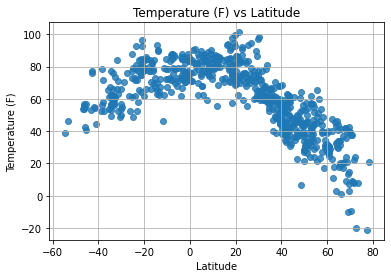

In [58]:
tempyaxis = weather_df["Temp"]
plt.scatter(xaxis, tempyaxis, alpha=0.8)
plt.title("Temperature (F) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)
tempvslatplot = plt.savefig("images/TemperaturevsLat.png")
plt.show()

In [59]:
# In the Temperature vs Latitude plot, cities between 20 deg N and 20 deg S Latitude i.e. 20 deg either side of equator has similar
# temperatures and are hotter than other cities, in general.
# From 20 deg N to 80 deg N Latitude, one can see stiff temperature drop--80 deg F to -20 deg F.
# From 20 deg S to 60 deg S Latitude, city temperatures drops from 80 deg F to 40 deg F.  

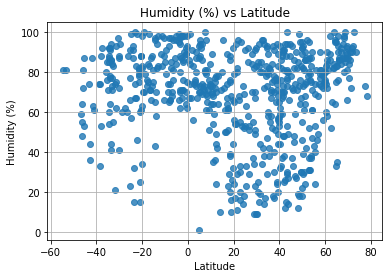

In [60]:
humaxis = weather_df["Humidity"]
plt.scatter(xaxis, humaxis, alpha=0.8)
plt.title("Humidity (%) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
tempvslatplot = plt.savefig("images/HumidityvsLat.png")
plt.show()

In [61]:
# The Humidity vs Latitude plot does not seem to have a strong correlation to latitude. 
# However, it can be clearly seenn that more cities have a humidity level above 60%. 
# Also, cities in northern hemispehere has a wider distribution than the cities in the southern hemisphere.

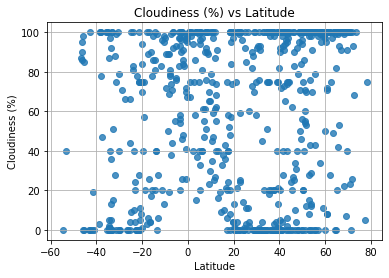

In [62]:
cloudaxis = weather_df["Cloudiness"]
plt.scatter(xaxis, cloudaxis, alpha=0.8)
plt.title("Cloudiness (%) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
tempvslatplot = plt.savefig("images/CloudinessvsLat.png")
plt.show()

In [63]:
# The Cloudiness vs Lattitude plot does not seem to have any correlation to latitude at all. However, there 
# seems to have some% of cloudiness always between 10 deg S and 15 deg N of equator.

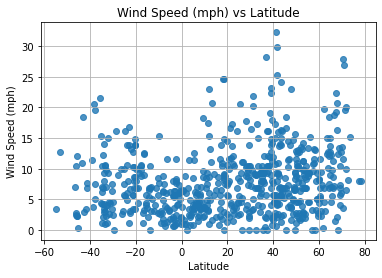

In [64]:
windaxis = weather_df["Wind Speed"]
plt.scatter(xaxis, windaxis, alpha=0.8)
plt.title("Wind Speed (mph) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
tempvslatplot = plt.savefig("images/WindSpeedvsLat.png")
plt.show()

In [65]:
# The Wind Speed vs Latitude plot suggests there is a week correlation between Wind Speed and Latitude. 
# Regardless of latitude one can see a wind speed between 0-20 mph, with most cities seeing it within 0-10 mph range.

In [66]:
# Make a function for a list of x values and y values, a description for the x and y axes,
# a string that describes the hemisphere is being analyzed, a filename for saving the figure
# and the x,y coordinates to place the equation on the graph
def make_lin_reg_plot(x_values,y_values,x_desc,y_desc,hemisphere,filename,x_ann,y_ann):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values,edgecolors='black')
    plt.plot(x_values,regress_values,"r-")
    plt.title(f"{hemisphere}-\nCity {x_desc} vs. {y_desc}")
    plt.annotate(line_eq,(x_ann,y_ann),fontsize=15,color="red")
    plt.xlabel(x_desc)
    plt.ylabel(y_desc)
    print(f"The r-squared is: {rvalue}")
    print(line_eq)
    plt.savefig(f'images/{filename}')
    plt.show()

In [67]:
# Create Northern and Southern Hemisphere DataFrames
# store criteria to pass  
crit_north = weather_df.Latitude >= 0
crit_south = weather_df.Latitude < 0

north_weather = weather_df[crit_north]
south_weather = weather_df[crit_south]

north_weather = north_weather.reset_index(drop=True)
south_weather = south_weather.reset_index(drop=True)
north_weather.head()

,City,Latitude,Longitude,Humidity,Temp,Cloudiness,Wind Speed,Country
0,husavik,66.0449,-17.3389,86.0,41.13,53,8.63,AU
1,dhidhdhoo,6.8833,73.1000,73.0,83.73,47,6.96,SA
2,qaqortoq,60.7167,-46.0333,90.0,26.40,8,5.19,EC
3,dikson,73.5069,80.5464,90.0,8.13,100,15.10,RU
4,muros,42.7762,-9.0603,88.0,53.83,96,6.87,CL


The r-squared is: -0.8660363350663164
y = -1.0x + 93.26


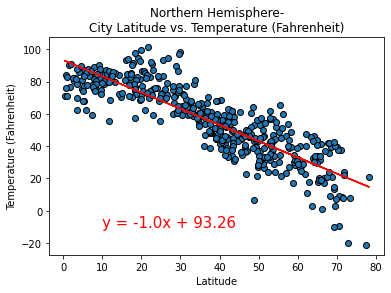

In [68]:
make_lin_reg_plot(north_weather["Latitude"],north_weather["Temp"],\
                  'Latitude','Temperature (Fahrenheit)','Northern Hemisphere',\
                 'NorthHemiLatVsTemp.png',10,-10)

The r-squared is: 0.6266171793962818
y = 0.56x + 82.06


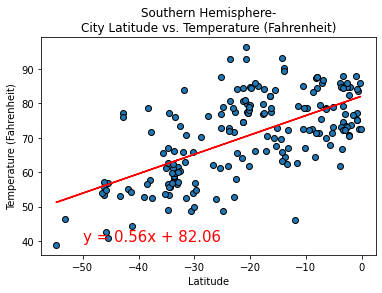

In [69]:
make_lin_reg_plot(south_weather["Latitude"],south_weather["Temp"],\
                  'Latitude',f'Temperature (Fahrenheit)','Southern Hemisphere',\
                 'SouthHemiLatVsTemp.png',-50,40)

The r-squared is: 0.15144149643641241
y = 0.19x + 58.9


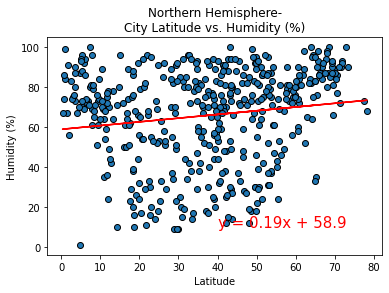

In [70]:
make_lin_reg_plot(north_weather["Latitude"],north_weather["Humidity"],\
                  'Latitude',f'Humidity (%)','Northern Hemisphere',\
                 'NorthHemiLatVsHumidity.png',40,10)

The r-squared is: 0.27394209715191015
y = 0.36x + 83.58


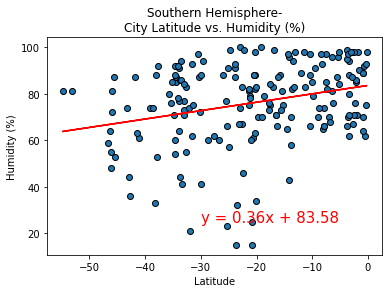

In [71]:
make_lin_reg_plot(south_weather["Latitude"],south_weather["Humidity"],\
                  'Latitude',f'Humidity (%)','Southern Hemisphere',\
                 'SouthHemiLatVsHumidity.png',-30,25)

The r-squared is: 0.11732493549079959
y = 0.24x + 50.3


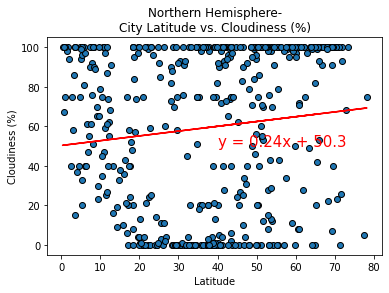

In [72]:
make_lin_reg_plot(north_weather["Latitude"],north_weather["Cloudiness"],\
                  'Latitude',f'Cloudiness (%)','Northern Hemisphere',\
                 'NorthHemiLatVsCloudiness.png',40,50)

The r-squared is: 0.31098402094182553
y = 0.89x + 72.66


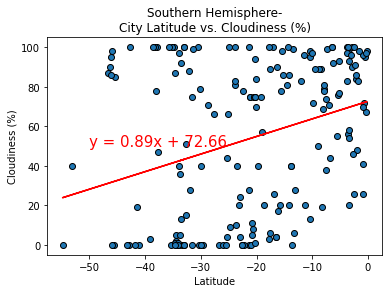

In [73]:
make_lin_reg_plot(south_weather["Latitude"],south_weather["Cloudiness"],\
                  'Latitude',f'Cloudiness (%)','Southern Hemisphere',\
                 'SouthHemiLatVsCloudiness.png',-50,50)

The r-squared is: 0.1940063665178193
y = 0.06x + 6.17


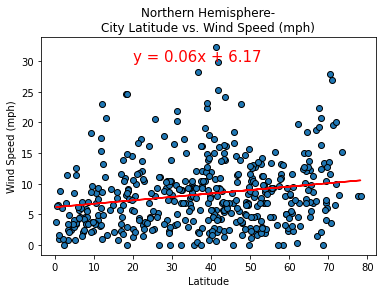

In [74]:
make_lin_reg_plot(north_weather["Latitude"],north_weather["Wind Speed"],\
                  'Latitude',f'Wind Speed (mph)','Northern Hemisphere',\
                 'NorthHemiLatVsWindSpeed.png',20,30)

The r-squared is: -0.23244263075127677
y = -0.08x + 5.03


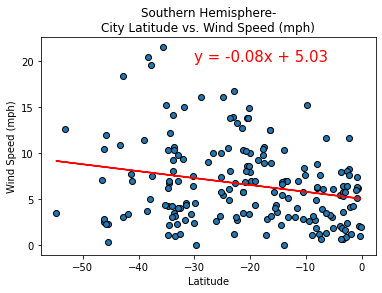

In [75]:
make_lin_reg_plot(south_weather["Latitude"],south_weather["Wind Speed"],\
                  'Latitude',f'Wind Speed (mph)','Southern Hemisphere',\
                 'SouthHemiLatVsWindSpeed.png',-30,20)